![](../src/logo.svg)

**© Jesús López**

Ask him any doubt on **[Twitter](https://twitter.com/jsulopz)** or **[LinkedIn](https://linkedin.com/in/jsulopz)**

# #02 | Why gender was the most important factor to survive the Titanic

![](src/tree.jpg)

Learn how to develop a Decision Tree Classifier in Python to understand why gender was the most important factor to survive the Titanic accident.

## Introduction to Supervised Classification Models

Machine Learning is a field that focuses on [**getting a mathematical equation**](https://twitter.com/sotastica/status/1449735653328031745) to make predictions about the future. Although not all Machine Learning models work the same way.

Which types of Machine Learning models can we distinguish so far?

- **Classifiers** to predict **Categorical Variables**
- **Regressors** to predict **Numerical Variables**

The previous chapter covered the explanation of a Regressor model: the Linear Regression.

This chapter covers the explanation of a Classification model: the Decision Tree.

Why do they belong to Machine Learning?

- The Machine wants to get the best numbers of a mathematical equation such that **the difference between reality and predictions is minimum**:

    - **Classifier** evaluates the model based on **prediction success rate**
        $$
        y \stackrel{?}{=} \hat y
        $$
    - **Regressor** evaluates the model based on the **distance between real data and predictions** (residuals) 
        $$
        y - \hat y
        $$

There are many Machine Learning Models of each type.

You don't need to know the process behind each model because they all work the same way (see article). In the end, you will choose the one makes better predictions.

This tutorial will show you how to develop a Decision Tree to calculate the probability of a person to survive the Titanic and the different evaluation metrics we can calculate on Classification Models.

**Table of Important Content**

1. 🛀 [How to preprocess/clean the data to fit a Machine Learning model?](#Data-Preprocessing)
    - Dummy Variables
    - Missing Data
2. 🤩 [How to **visualize** a Decision Tree model in Python step by step?](#Model-Visualization)
3. 🤔 [How to **interpret** the nodes and leafs values of a Decision Tree plot?](#Model-Interpretation)
4. ⚠️ How to **evaluate** Classification models?
    - [Accuracy](#Model's-Score)
    - [Confussion Matrix](#The-Confusion-Matrix-to-compute-Other-Classification-Metrics)
        - Sensitivity
        - Specificity
        - ROC Curve
5. 🏁 [How to compare Classification models to choose the best one?](#Which-One-Is-the-Best-Model?-Why?)

## [ ] Load the Data

- This dataset represents **people** (rows) aboard the Titanic
- And their **sociological characteristics** (columns)

In [5]:
import seaborn as sns #!
import pandas as pd

df_titanic = sns.load_dataset(name='titanic')[['survived', 'sex', 'age', 'embarked', 'class']]
df_titanic

,survived,sex,age,embarked,class
0,0,male,22.0,S,Third
1,1,female,38.0,C,First
2,1,female,26.0,S,Third
3,1,female,35.0,S,First
4,0,male,35.0,S,Third
...,...,...,...,...,...
886,0,male,27.0,S,Second
887,1,female,19.0,S,First
888,0,female,NaN,S,Third
889,1,male,26.0,C,First


## How do we compute a Decision Tree Model in Python?

### Import the Class

In [6]:
from sklearn.tree import DecisionTreeClassifier

### Instantiante the Class

In [7]:
model_dt = DecisionTreeClassifier()

### Access the Function

In [8]:
model_dt.fit()

TypeError: fit() missing 2 required positional arguments: 'X' and 'y'

### Separate the Variables

In [9]:
target = df_titanic.survived
features = df_titanic.drop(columns="survived")

### Fit the Model

In [10]:
model_dt.fit(X=features, y=target)

ValueError: could not convert string to float: 'male'

## [ ] Data Preprocessing

In [ ]:
df_titanic

### Dummy Variables

In [12]:
pd.get_dummies(data=df_titanic)

,survived,age,sex_male,embarked_Q,embarked_S,class_Second,class_Third
0,0,22.0,1,0,1,0,1
1,1,38.0,0,0,0,0,0
2,1,26.0,0,0,1,0,1
3,1,35.0,0,0,1,0,0
4,0,35.0,1,0,1,0,1
...,...,...,...,...,...,...,...
886,0,27.0,1,0,1,1,0
887,1,19.0,0,0,1,0,0
888,0,NaN,0,0,1,0,1
889,1,26.0,1,0,0,0,0


In [13]:
df_titanic = pd.get_dummies(data=df_titanic, drop_first=True)

*Now we separate the data*

In [14]:
features = df_titanic.drop(columns="survived")

In [15]:
target = df_titanic.survived

**Fit the Model Again**

In [16]:
model_dt.fit(X=features, y=target)

ValueError: Input X contains NaN.
DecisionTreeClassifier does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

### Missing Data

In [17]:
mask = df_titanic.isna().sum(axis=1) > 0

In [18]:
df_titanic[mask]

,survived,age,sex_male,embarked_Q,embarked_S,class_Second,class_Third
5,0,NaN,1,1,0,0,1
17,1,NaN,1,0,1,1,0
19,1,NaN,0,0,0,0,1
26,0,NaN,1,0,0,0,1
28,1,NaN,0,1,0,0,1
...,...,...,...,...,...,...,...
859,0,NaN,1,0,0,0,1
863,0,NaN,0,0,1,0,1
868,0,NaN,1,0,1,0,1
878,0,NaN,1,0,1,0,1


In [19]:
df_titanic = df_titanic.dropna().reset_index(drop=True)

In [20]:
features = df_titanic.drop(columns="survived")
target = df_titanic.survived

**Fit the Model Again**

In [21]:
model_dt.fit(X=features, y=target)

DecisionTreeClassifier()

### [ ] Model Visualization

In [22]:
from sklearn.tree import plot_tree

In [23]:
model_dt = DecisionTreeClassifier(max_depth=2)

In [24]:
model_dt.fit(X=features, y=target) #we fit again the model to apply the changes

DecisionTreeClassifier(max_depth=2)

In [25]:
import matplotlib.pyplot as plt

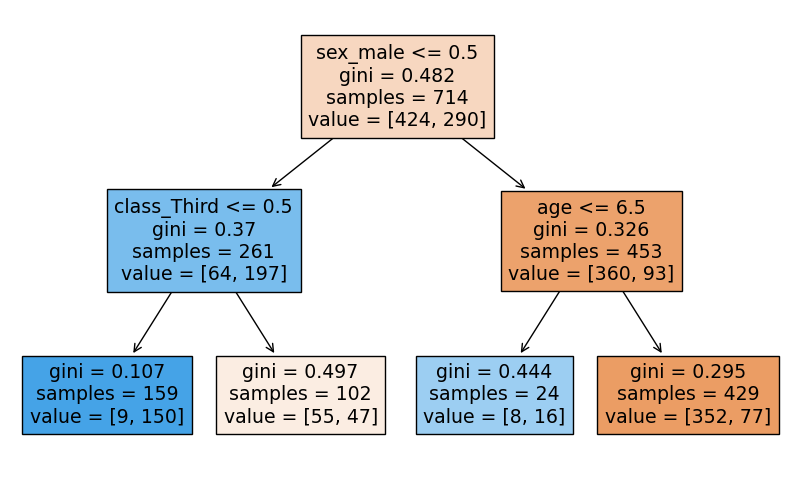

In [26]:
plt.figure(figsize=(10, 6))
plot_tree(decision_tree=model_dt, feature_names=features.columns, filled=True);

### Predictions

#### Calculate Predictions

In [27]:
model_dt.predict_proba(X=features) #we use predict_proba() instead of predict() function because decision model calculates probabilities

array([[0.82051282, 0.17948718],
       [0.05660377, 0.94339623],
       [0.53921569, 0.46078431],
       ...,
       [0.05660377, 0.94339623],
       [0.82051282, 0.17948718],
       [0.82051282, 0.17948718]])

*The output of the prediction has two columns:*
> The first is the probability of not surviving

> The second column is telling the probability of surviving

#### Add a New Column with the Predictions

In [28]:
df_pred = df_titanic[["survived"]].copy()

In [29]:
df_pred.head()

,survived
0,0
1,1
2,1
3,1
4,0


*We just add the 2nd column of values of the `pred_proba()` output, because we want the probability of surviving, so we access to it whith a Python tool: [:,1]*

In [30]:
df_pred["pred_proba_dt"] = model_dt.predict_proba(X=features)[:,1]

### [ ] Model Interpretation

In [31]:
import matplotlib.pyplot as plt

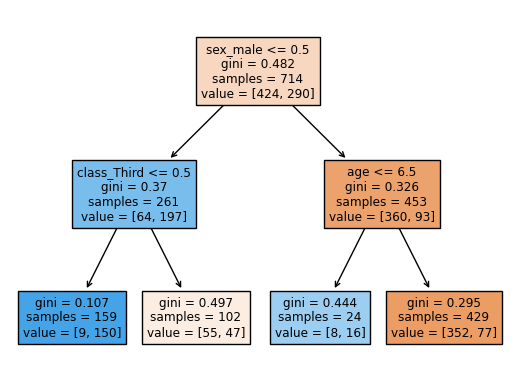

In [32]:
plot_tree(decision_tree=model_dt, feature_names=features.columns, filled=True); #make sure to put a (;) at the end of the statement to avoid lot of text in the image

In [33]:
df_titanic[:1]

,survived,age,sex_male,embarked_Q,embarked_S,class_Second,class_Third
0,0,22.0,1,0,1,0,1


John

In [34]:
features[:1]

,age,sex_male,embarked_Q,embarked_S,class_Second,class_Third
0,22.0,1,0,1,0,1


In [35]:
model_dt.predict_proba(X=features[:1])[:,1] #we calculate te prediction for the last row, and access to second column of probability pred

array([0.17948718])

*Jhon has a probability of surviving of a 17%*

### [ ] Model's Score

#### Calculate the Score

In [36]:
model_dt.score(X=features, y=target)

0.8025210084033614

*Our model can predict the `80%` of the real data*

#### The Score Step-by-step

In [37]:
import numpy as np

#this function will convert to 1 the values of probability of surviving if the number is greater than 0.5, otherwise, will be 0
df_pred["pred_dt"] = np.where(model_dt.predict_proba(X=features)[:,1] > 0.5, 1, 0)

In [38]:
comp = df_pred.survived == df_pred.pred_dt #compare the real survive data with predictions

In [39]:
comp.sum() #by making the sum of the equal number in comp variable and dividing by the number of people in the dataset (714), we get the same value as score() function

573

In [40]:
model_dt.score(X=features, y=target)

0.8025210084033614

*We also can compute the score by making the mean of the "comp" values*

In [41]:
comp.mean()

0.8025210084033614

### [ ] The Confusion Matrix to Compute Other Classification Metrics

*With confusion matrix, we can see who many people had predicted effectively of each category*

In [42]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

In [43]:
cm = confusion_matrix(
    y_true=df_pred.survived,
    y_pred=df_pred.pred_dt)

In [44]:
CN = ConfusionMatrixDisplay(cm)

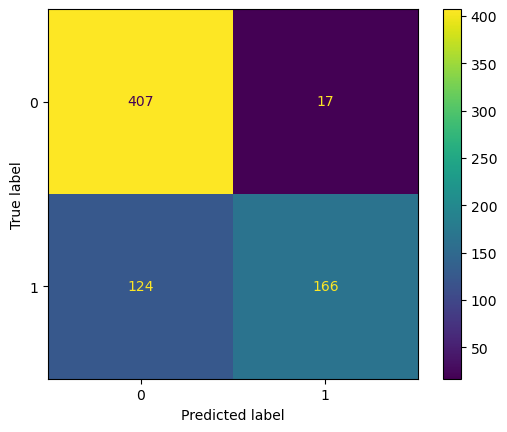

In [45]:
CN.plot()

#### Specificity (Recall=0)

**$TN \div (TN + FP)$**

In [46]:
407/(407+17)

0.9599056603773585

#### Sensitivity (Recall=1)

$TP \div (TP + FN)$

In [47]:
166/(166+124)

0.5724137931034483

#### Classification Report

In [48]:
from sklearn.metrics import classification_report

In [59]:
report = classification_report(
    y_true=df_pred.survived,
    y_pred=df_pred.pred_dt,
    output_dict=True
)

In [61]:
pd.DataFrame(report)

,0,1,accuracy,macro avg,weighted avg
precision,0.766478,0.907104,0.802521,0.836791,0.823595
recall,0.959906,0.572414,0.802521,0.766160,0.802521
f1-score,0.852356,0.701903,0.802521,0.777129,0.791248
support,424.000000,290.000000,0.802521,714.000000,714.000000


#### [ ] ROC Curve

In [51]:
%%HTML
<iframe width="560" height="315" src="https://www.youtube.com/embed/4jRBRDbJemM" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

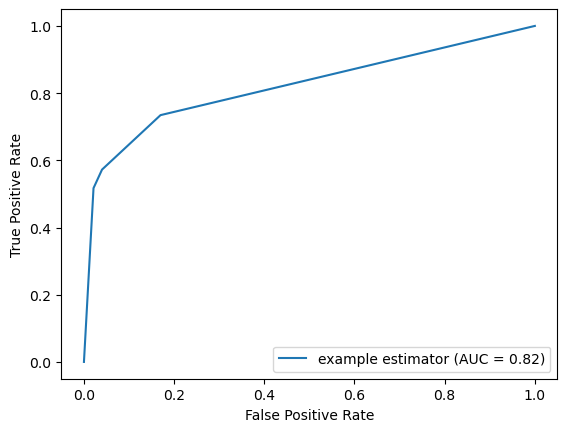

In [64]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics

y = df_pred.survived
pred = model_dt.predict_proba(X=features)[:,1]

fpr, tpr, thresholds = metrics.roc_curve(y, pred)
roc_auc = metrics.auc(fpr, tpr)

display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                  estimator_name='example estimator')
display.plot()
plt.show()


## [ ] Other Classification Models

### `RandomForestClassifier()` in Python

In [65]:
from sklearn.ensemble import RandomForestClassifier

In [66]:
model_rf = RandomForestClassifier()

#### Fit the Model

In [67]:
model_rf.fit(X=features, y=target)

RandomForestClassifier()

#### Calculate Predictions

In [68]:
df_pred["pred_rf"] = model_rf.predict(X=features)

In [69]:
df_pred.head()

,survived,pred_proba_dt,pred_dt,pred_rf
0,0,0.179487,0,0
1,1,0.943396,1,1
2,1,0.460784,0,1
3,1,0.943396,1,1
4,0,0.179487,0,0


#### Model's Score

In [70]:
model_rf.score(X=features, y=target)

0.9117647058823529

### `SVC()` in Python

In [71]:
from sklearn.svm import SVC

In [72]:
model_sv = SVC()

#### Fit the Model

In [73]:
model_sv.fit(X=features, y=target)

SVC()

#### Calculate Predictions

In [75]:
df_pred["pred_sv"] = model_sv.predict(X=features)

#### Model's Score

In [76]:
model_sv.score(X=features, y=target)

0.6190476190476191

## Which One Is the Best Model? Why?

In [77]:
model_dt.score(X=features, y=target)

0.8025210084033614

In [78]:
model_rf.score(X=features, y=target)

0.9117647058823529

In [79]:
model_sv.score(X=features, y=target)

0.6190476190476191

<a rel="license" href="http://creativecommons.org/licenses/by-nc-nd/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-nd/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc-nd/4.0/">Creative Commons Attribution-NonCommercial-NoDerivatives 4.0 International License</a>.